In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame, Panel
from sklearn import preprocessing
pd.set_option('display.max_rows',15)

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
pd.__version__

'0.22.0'

In [5]:
bitcoin = pd.read_csv ('./bitcoin_price.csv', parse_dates = True, index_col = [0])

In [6]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
2018-02-15,9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
...,...,...,...,...,...,...
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"


In [7]:
bitcoin = bitcoin.sort_index(ascending = True)

In [8]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"


In [9]:
bitcoin.shape

(1760, 6)

In [10]:
bitClose = bitcoin['Close']

In [11]:
bitClose = pd.DataFrame(bitClose)
bitClose

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75
2013-05-04,112.50
...,...
2018-02-14,9494.63


Text(0.5,1,'Close Price')

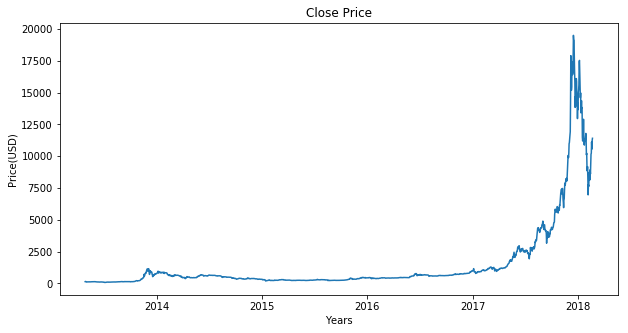

In [12]:
plt.figure(figsize = (10, 5))
plt.plot(bitClose)
plt.xlabel('Years')
plt.ylabel('Price(USD)')
plt.title('Close Price')

In [13]:
rolMean = bitClose.rolling(window = 7).mean()
rolVar = bitClose.rolling(window = 7).std()

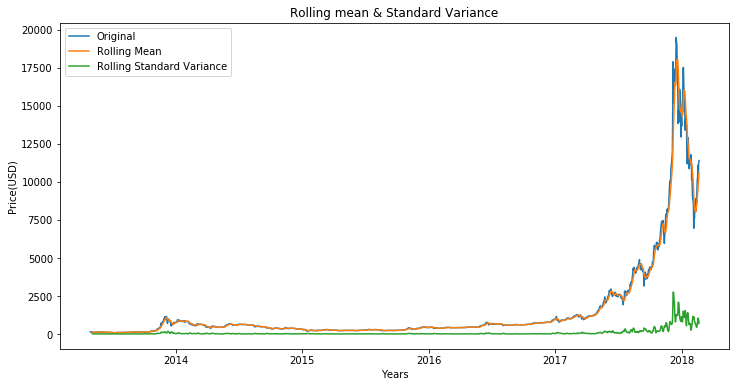

In [14]:
plt.figure(figsize=(12,6))
plt.plot(bitClose, label = 'Original')
plt.plot(rolMean,label = 'Rolling Mean')
plt.plot(rolVar, label = 'Rolling Standard Variance')
plt.legend(loc = 'best')
plt.title('Rolling mean & Standard Variance')
plt.xlabel('Years')
plt.ylabel('Price(USD)')
plt.show()

In [15]:
UpperBand = rolMean + rolVar * 2
LowerBand = rolMean - rolVar * 2

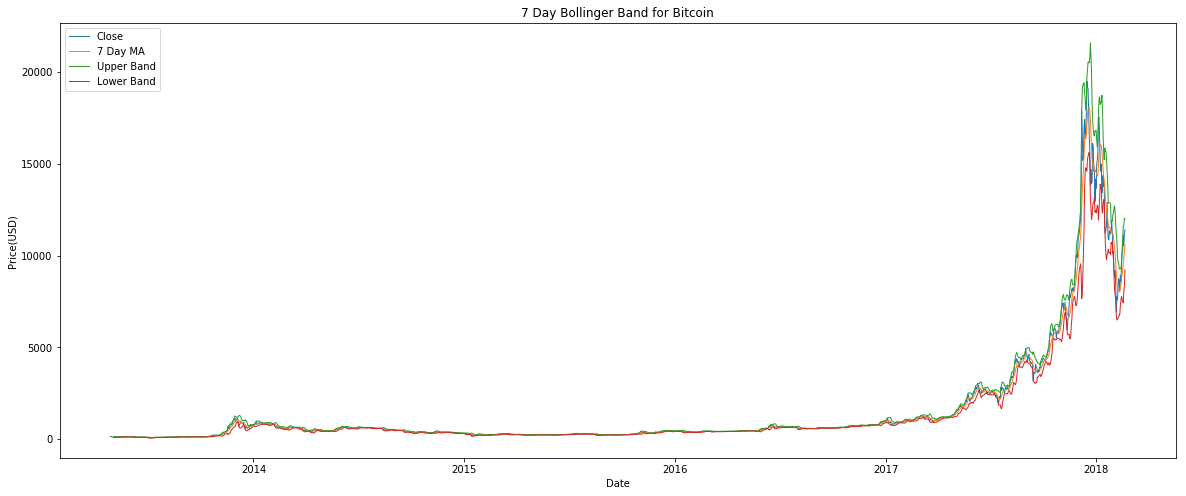

In [16]:
plt.figure(figsize=(20,8))
plt.plot(bitClose, label='Close',linewidth=1.0)
plt.plot(rolMean,label='7 Day MA',linewidth=1.0)
plt.plot(UpperBand,label='Upper Band',linewidth=1.0)
plt.plot(LowerBand,label='Lower Band',linewidth=1.0)
plt.legend(loc='best')
plt.title('7 Day Bollinger Band for Bitcoin')
plt.ylabel('Price(USD)')
plt.xlabel('Date')
plt.show()

In [17]:
bitClose

,Close
Date,
2013-04-28,134.21
2013-04-29,144.54
2013-04-30,139.00
2013-05-01,116.99
2013-05-02,105.21
2013-05-03,97.75
2013-05-04,112.50
...,...
2018-02-14,9494.63


In [18]:
X_scaled=preprocessing.scale(bitClose)

In [19]:
X_scaled

array([[-0.45684347],
       [-0.45335175],
       [-0.45522437],
       ...,
       [ 3.06448669],
       [ 3.29214164],
       [ 3.352444  ]])

In [20]:
import tensorflow as tf

/home/sunny/.conda/envs/py3env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [21]:
# -------------Dealing with missing values and comma-in-string situation---------------

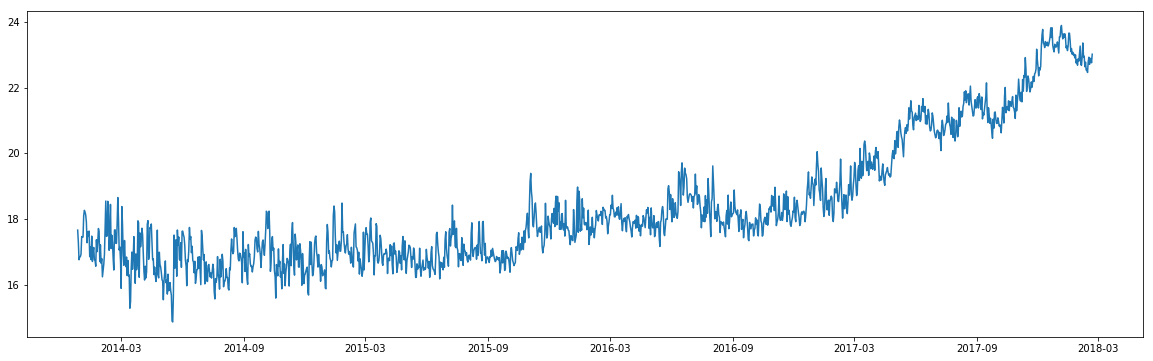

In [22]:
# drop the missing datapoints with '-'
bitVol = bitcoin['Volume']
bitVol_1 = bitVol[bitVol != "-"]
bitVol_1 = bitVol_1.apply(lambda x: float(x.replace(',', '')))
bitVolNorm_1 = np.log(bitVol_1)

# draw the rest Volume part in Bitcoin database
plt.figure(figsize = (20, 6))
plt.plot(bitVolNorm_1)
plt.show()

In [23]:
bitVolNorm_1

Date
2013-12-27    17.662733
2013-12-28    17.296929
2013-12-29    16.760544
2013-12-30    16.846016
2013-12-31    16.855131
2014-01-01    16.928555
2014-01-02    17.465896
                ...    
2018-02-14    22.791371
2018-02-15    22.927415
2018-02-16    22.710614
2018-02-17    22.882082
2018-02-18    22.891635
2018-02-19    22.758245
2018-02-20    23.018478
Name: Volume, Length: 1517, dtype: float64

In [24]:
# extract values of 2014-01 to 2014-09
bitVol2014 = pd.DataFrame(bitVol_1)
bitVol2014 = bitVol2014.loc['2014-01-01':'2014-10-01']
bitVol2014

,Volume
Date,
2014-01-01,22489400.0
2014-01-02,38489500.0
2014-01-03,37810100.0
2014-01-04,38005000.0
2014-01-05,72898500.0
2014-01-06,85565700.0
2014-01-07,81311700.0
...,...
2014-09-25,26814400.0


In [25]:
# calculate the mean value of the range shown above
bitVol2014Mean = bitVol2014['Volume'].mean()
bitVol2014Mean

25801388.321167883

In [26]:
# replace datapoints with value '-' with mean value calculated aboce
bitVol_2 = bitVol[bitVol == "-"]
bitVol_2 = bitVol_2.apply(lambda x: float(x.replace('-', '%f' % (bitVol2014Mean))))
bitVolNorm_2 = np.log(bitVol_2)
bitVolNorm_2

Date
2013-04-28    17.065939
2013-04-29    17.065939
2013-04-30    17.065939
2013-05-01    17.065939
2013-05-02    17.065939
2013-05-03    17.065939
2013-05-04    17.065939
                ...    
2013-12-20    17.065939
2013-12-21    17.065939
2013-12-22    17.065939
2013-12-23    17.065939
2013-12-24    17.065939
2013-12-25    17.065939
2013-12-26    17.065939
Name: Volume, Length: 243, dtype: float64

In [27]:
# update the values on original dataset
bitVol.update(bitVol_2)

In [28]:
# update the values on original dataset
bitVol.update(bitVol_1)

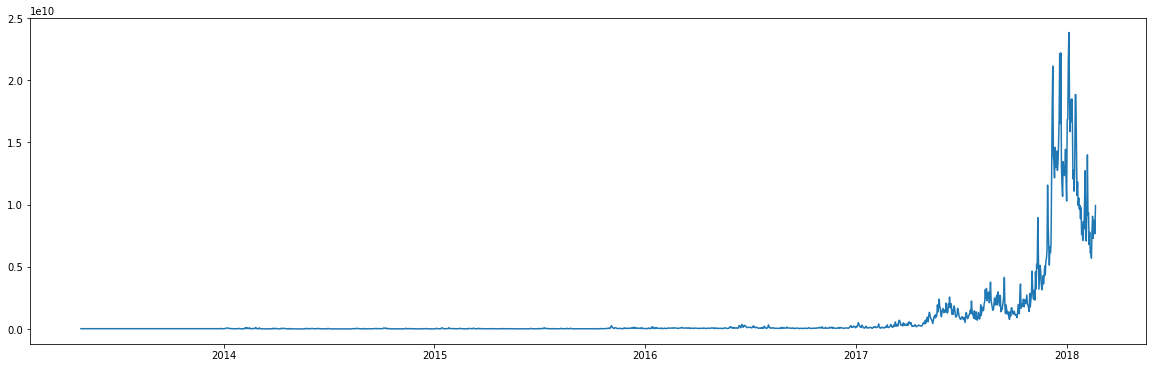

In [29]:
# redraw the total dataset for Volume part
plt.figure(figsize = (20, 6))
plt.plot(bitVol)
plt.show()

In [30]:
type(bitVol)

pandas.core.series.Series

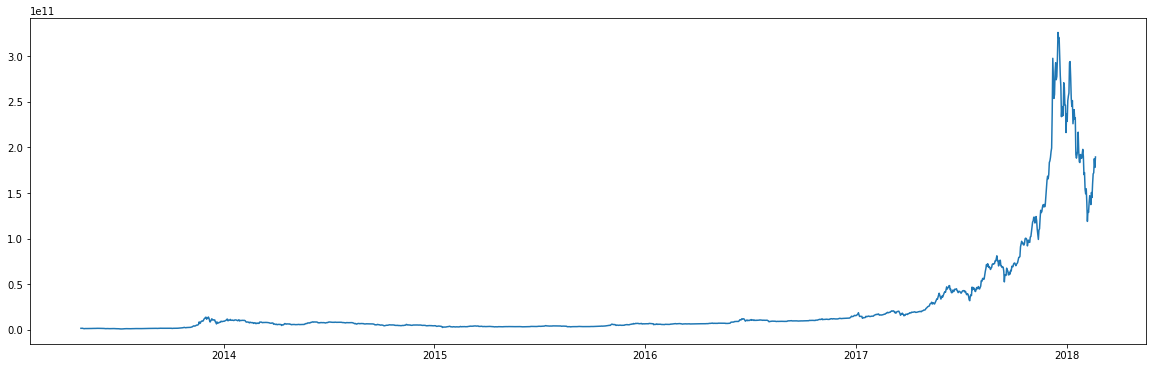

In [31]:
# remove the comma in the dataset for Market Cap
bitMC = bitcoin['Market Cap'].apply(lambda x: float(x.replace(',', '')))

# draw the total dataset for Market Cap part
plt.figure(figsize = (20, 6))
plt.plot(bitMC)
plt.show()

In [32]:
bitcoin['Market Cap'].update(bitMC)
bitcoin['Volume'].update(bitVol)

In [33]:
# ---------------Preparing training and test data--------------------

In [34]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,2.58014e+07,1.50052e+09
2013-04-29,134.44,147.49,134.00,144.54,2.58014e+07,1.49116e+09
2013-04-30,144.00,146.93,134.05,139.00,2.58014e+07,1.59778e+09
2013-05-01,139.00,139.89,107.72,116.99,2.58014e+07,1.54282e+09
2013-05-02,116.38,125.60,92.28,105.21,2.58014e+07,1.29219e+09
2013-05-03,106.25,108.13,79.10,97.75,2.58014e+07,1.18007e+09
2013-05-04,98.10,115.00,92.50,112.50,2.58014e+07,1.08989e+09
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,7.90982e+09,1.45023e+11


In [35]:
# training and test data
split = int(0.9 * bitcoin.shape[0])
train_data = bitcoin[0 : split]
test_data = bitcoin[split:]

In [36]:
test_data

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2017-08-29,4389.21,4625.68,4352.13,4579.02,2.48608e+09,7.25538e+10
2017-08-30,4570.36,4626.52,4471.41,4565.30,1.93785e+09,7.55566e+10
2017-08-31,4555.59,4736.05,4549.40,4703.39,1.94493e+09,7.53223e+10
2017-09-01,4701.76,4892.01,4678.53,4892.01,2.59908e+09,7.77484e+10
2017-09-02,4901.42,4975.04,4469.24,4578.77,2.72214e+09,8.10606e+10
2017-09-03,4585.27,4714.08,4417.59,4582.96,1.93319e+09,7.58417e+10
2017-09-04,4591.63,4591.63,4108.40,4236.31,2.98733e+09,7.59555e+10
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,7.90982e+09,1.45023e+11


In [66]:
# scale data
scaler = preprocessing.MinMaxScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [67]:
train_data

array([[0.01547747, 0.013927  , 0.01565705, 0.01524644, 0.00609977,
        0.01006108],
       [0.01527821, 0.01653689, 0.01610392, 0.01764072, 0.00609977,
        0.00993051],
       [0.01749325, 0.01640991, 0.01611568, 0.01635666, 0.00609977,
        0.01141778],
       ...,
       [0.99712925, 0.976096  , 0.98876465, 0.99293537, 0.40111643,
        0.99694791],
       [0.99088266, 0.98455605, 1.        , 1.        , 0.4079889 ,
        0.99081166],
       [1.        , 0.98168539, 0.97820902, 0.99994901, 0.52014714,
        1.        ]])

In [68]:
train_data.shape

(1584, 6)

In [69]:
test_data

array([[1.00110289, 1.03196724, 1.00819425, 1.04546118, 0.66018874,
        1.00119824],
       [1.04307511, 1.03215771, 1.03624852, 1.04228117, 0.51443647,
        1.04308493],
       [1.03965292, 1.05699366, 1.05459151, 1.07428757, 0.51631876,
        1.03981663],
       ...,
       [2.56140595, 2.5566626 , 2.41322887, 2.42982767, 2.32392024,
        2.6068807 ],
       [2.42915233, 2.53942959, 2.4572577 , 2.585931  , 2.0336227 ,
        2.47285668],
       [2.58652209, 2.69468543, 2.62627006, 2.62728042, 2.63830734,
        2.63300757]])

In [70]:
test_data.shape

(176, 6)

In [71]:
# for training set, extract dataset for each part
open_train = train_data[:, 0]
high_train = train_data[:, 1]
low_train = train_data[:, 2]
close_train = train_data[:, 3]
volume_train = train_data[:, 4]
mc_train = train_data[:, 5]

open_train = open_train.reshape(open_train.shape[0], 1)
high_train = high_train.reshape(high_train.shape[0], 1)
low_train = low_train.reshape(low_train.shape[0], 1)
close_train = close_train.reshape(close_train.shape[0], 1)
volume_train = volume_train.reshape(volume_train.shape[0], 1)
mc_train = mc_train.reshape(mc_train.shape[0], 1)

# for testset, extract dataset for each part
open_test = test_data[:, 0]
high_test = test_data[:, 1]
low_test = test_data[:, 2]
close_test = test_data[:, 3]
volume_test = test_data[:, 4]
mc_test = test_data[:, 5]

open_test = open_test.reshape(open_test.shape[0], 1)
high_test = high_test.reshape(high_test.shape[0], 1)
low_test = low_test.reshape(low_test.shape[0], 1)
close_test = close_test.reshape(close_test.shape[0], 1)
volume_test = volume_test.reshape(volume_test.shape[0], 1)
mc_test = mc_test.reshape(mc_test.shape[0], 1)


In [72]:
close_test.shape

(176, 1)

In [73]:
open_train

array([[0.01547747],
       [0.01527821],
       [0.01749325],
       ...,
       [0.99712925],
       [0.99088266],
       [1.        ]])

In [74]:
mc_train

array([[0.01006108],
       [0.00993051],
       [0.01141778],
       ...,
       [0.99694791],
       [0.99081166],
       [1.        ]])

In [75]:
# combine the open_train, volume_train, mc_train 
# dataset into one (1584 x 3) matrix as input train matrix
x_train = np.concatenate((open_train, volume_train, mc_train), axis = 1)

# consider close_train as (1584 x 1) output train matrix
y_train = close_train

# combine the open_test, volume_test, mc_test 
# dataset into one (1584 x 3) matrix as input test matrix
x_test = np.concatenate((open_test, volume_test, mc_test), axis = 1)

# consider close_train as (1584 x 1) output test matrix
y_test = close_test


# set number of dataset
n_dataset = x_train.shape[1]

# set number of neurons for each hidden layer
n_neuron_1 = 256
n_neuron_2 = 128
n_neuron_3 = 64
n_target = 1


In [76]:
# Session
net = tf.InteractiveSession()

/home/sunny/.conda/envs/py3env/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [77]:
print(len(y_train), len(y_train) % 128)

1584 48


In [78]:
# define the each training set as a placeholder
# input placeholder 
# open_train = tf.placeholder(dtype = tf.float32, name = "open_train", shape = open_train.shape)
# high_train = tf.placeholder(dtype = tf.float32, name = "high_train", shape = high_train.shape)
# low_train = tf.placeholder(dtype = tf.float32, name = "low_train", shape = low_train.shape)

# volume_train = tf.placeholder(dtype = tf.float32, name = "volume_train", shape = volume_train.shape)
# mc_train = tf.placeholder(dtype = tf.float32, name = "mc_train", shape = mc_train.shape)

'''The None argument indicates that at this point we do not yet know the number of 
   observations that flow through the neural net graph in each batch
'''
X = tf.placeholder(dtype = tf.float32, name = "X", shape = [None, n_dataset])

# output placeholder
# close_train = tf.placeholder(dtype = tf.float32, name = "close_train", shape = close_train.shape)
Y = tf.placeholder(dtype = tf.float32, name = "Y", shape = [None, 1])

In [79]:
X

<tf.Tensor 'X_2:0' shape=(?, 3) dtype=float32>

In [80]:
Y

<tf.Tensor 'Y_2:0' shape=(?, 1) dtype=float32>

In [81]:
# Initializers
sigma = 1.0
weight_initializer = tf.variance_scaling_initializer(mode = "fan_avg", distribution = "uniform", scale = sigma)
bias_initializer = tf.zeros_initializer()

In [82]:
# model archtecture parameters
# hidden weights + bias

# Layer 1: Variables for hidden weights and biases
w_hidden_1 = tf.Variable(weight_initializer([n_dataset, n_neuron_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neuron_1]))

# Layer 2: Variables for hidden weights and biases
w_hidden_2 = tf.Variable(weight_initializer([n_neuron_1, n_neuron_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neuron_2]))

# Layer 3: Variable for hidden weights and biases
w_hidden_3 = tf.Variable(weight_initializer([n_neuron_2, n_neuron_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neuron_3]))

# Output Layer: Variables for output weights and biases
w_out = tf.Variable(weight_initializer([n_neuron_3, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [112]:
# hidden layer (activation function: ReLU)

# Activation for layer 1
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, w_hidden_1), bias_hidden_1))

# Activation for layer 2
hidden_2 = tf.nn.relu(tf.add(tf.matmul(w_hidden_1, w_hidden_2), bias_hidden_2))

# Activation for layer 3
hidden_3 = tf.nn.relu(tf.add(tf.matmul(w_hidden_2, w_hidden_3), bias_hidden_3))

# Output layer
out = tf.transpose(tf.add(tf.matmul(w_hidden_3, w_out), bias_out))

In [113]:
hidden_1

<tf.Tensor 'Relu_9:0' shape=(?, 256) dtype=float32>

In [114]:
out

<tf.Tensor 'transpose_2:0' shape=(1, 128) dtype=float32>

In [115]:
# cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [116]:
mse

<tf.Tensor 'Mean_3:0' shape=() dtype=float32>

In [117]:
# optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [118]:
opt

<tf.Operation 'Adam_3' type=NoOp>

In [119]:
# Initialize all variables
net.run(tf.global_variables_initializer())

(176, 1) <class 'numpy.ndarray'>


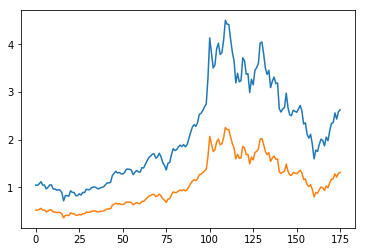

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


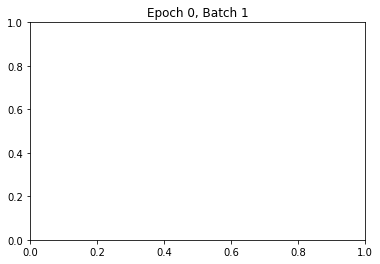

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


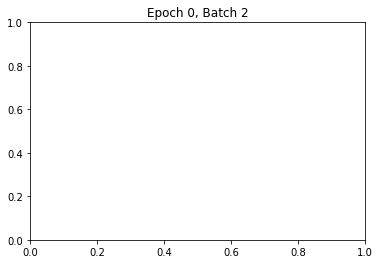

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


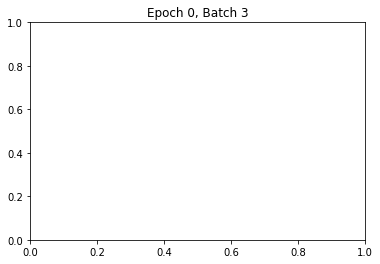

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


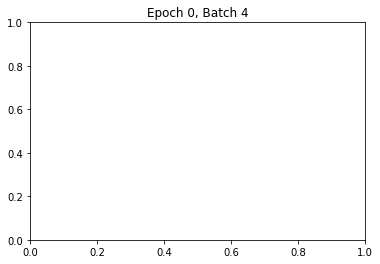

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


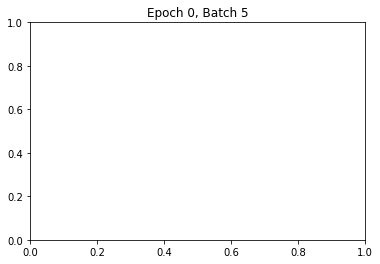

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


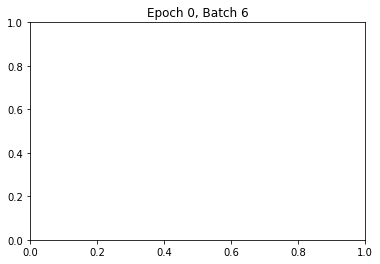

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


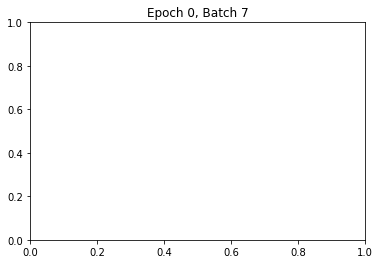

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


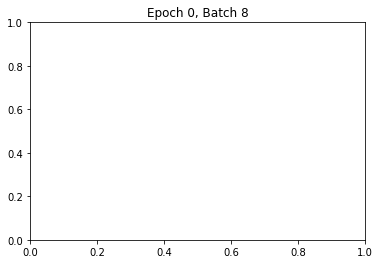

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


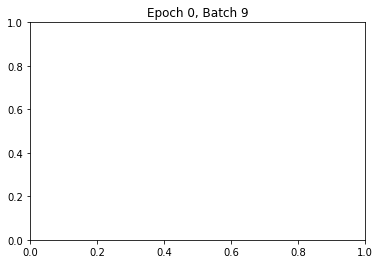

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


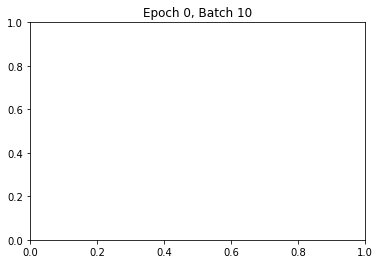

MSE Train:  0.024547333
MSE Test:  4.864185
Pred:  (1, 128)


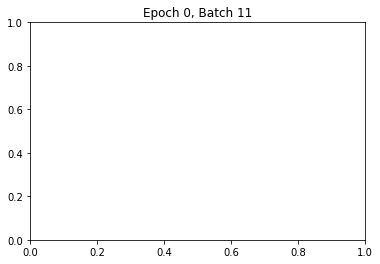

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


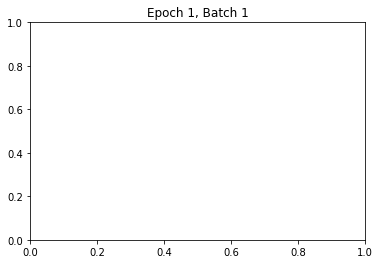

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


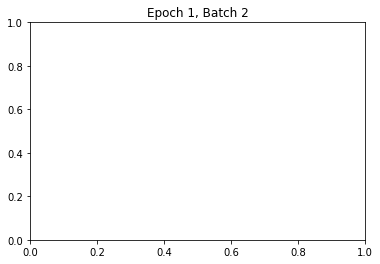

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


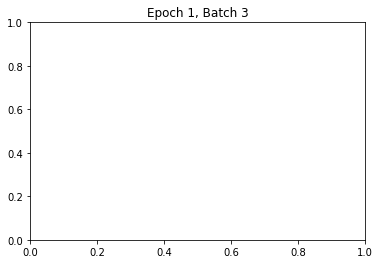

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


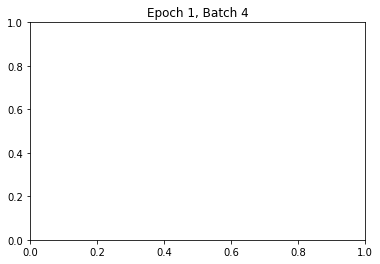

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


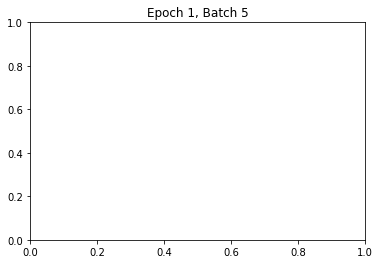

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


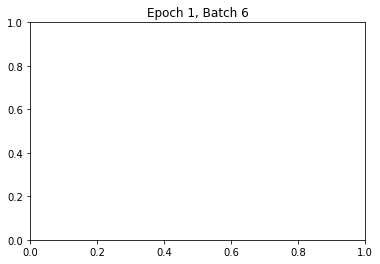

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


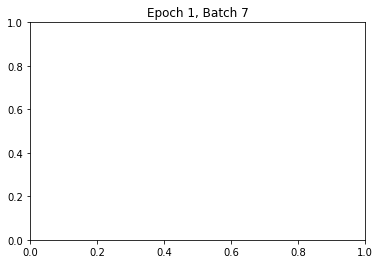

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


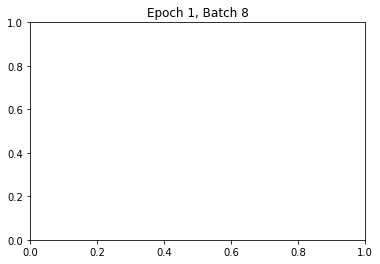

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


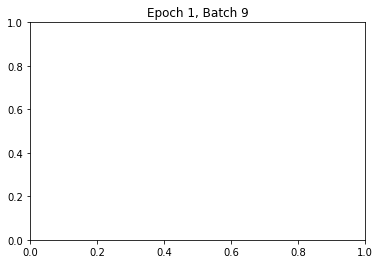

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


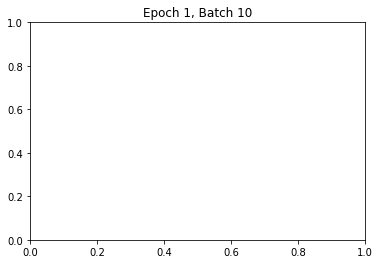

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


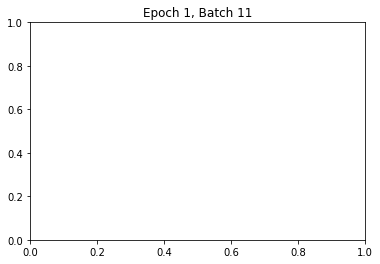

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


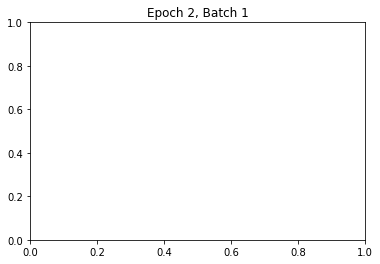

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


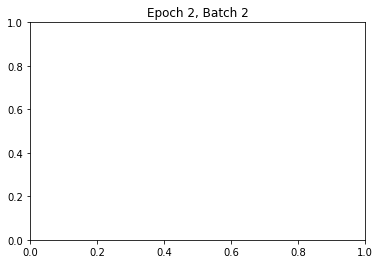

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


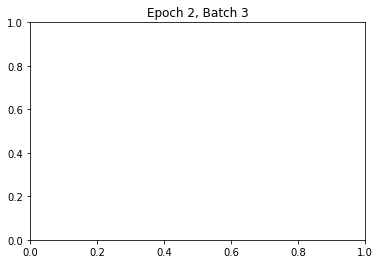

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


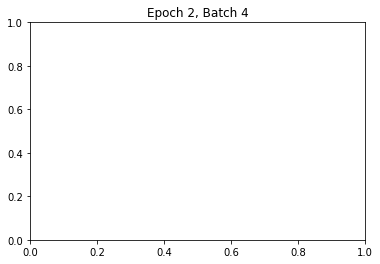

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


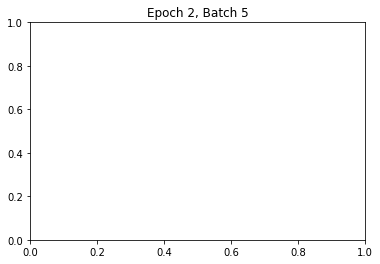

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


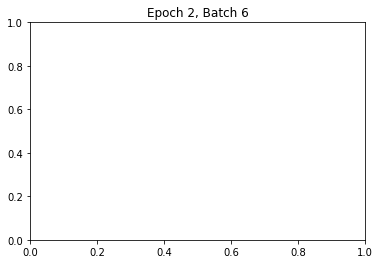

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


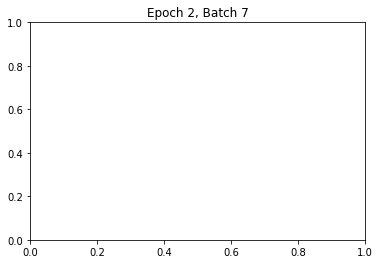

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


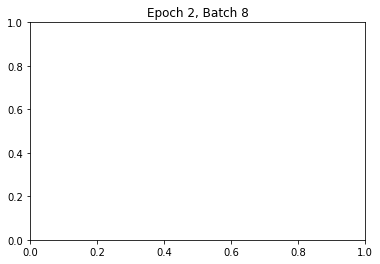

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


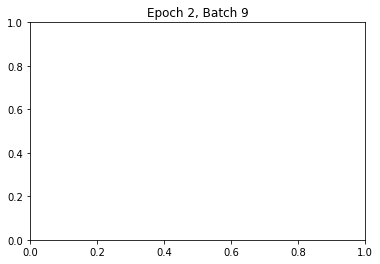

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


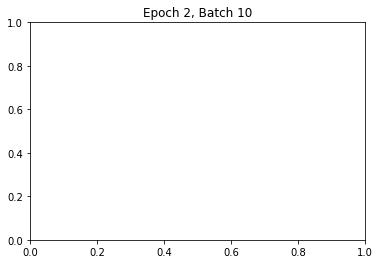

MSE Train:  0.024547454
MSE Test:  4.864185
Pred:  (1, 128)


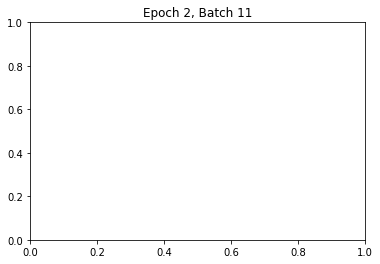

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


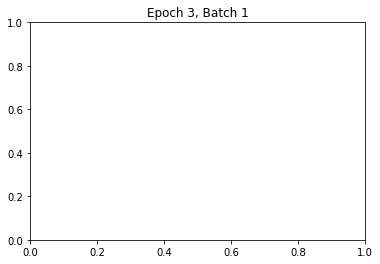

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


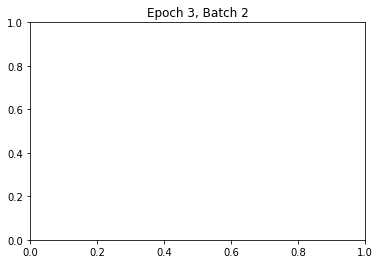

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


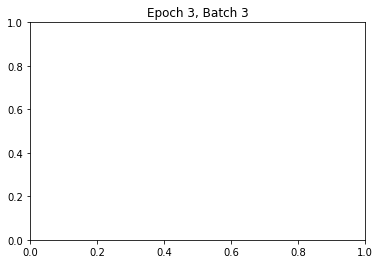

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


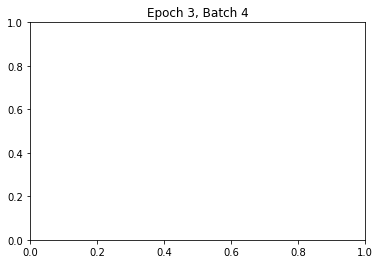

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


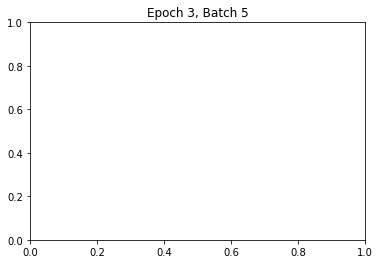

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


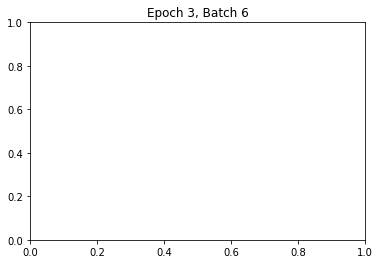

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


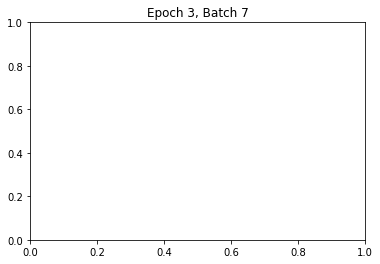

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


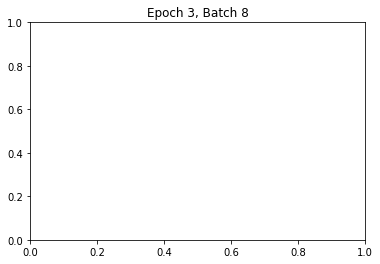

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


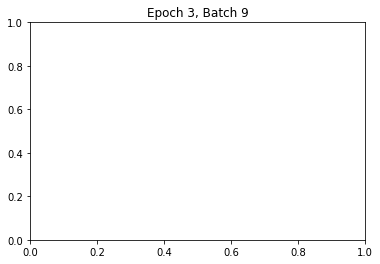

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


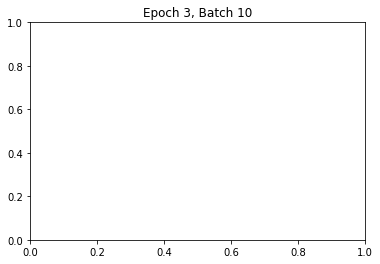

MSE Train:  0.024547134
MSE Test:  4.864185
Pred:  (1, 128)


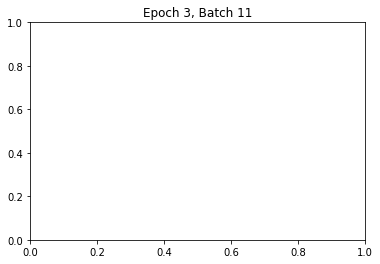

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


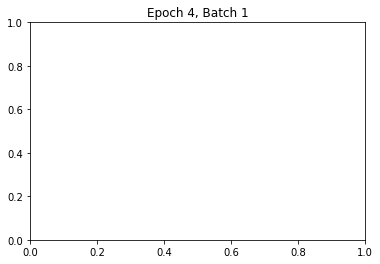

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


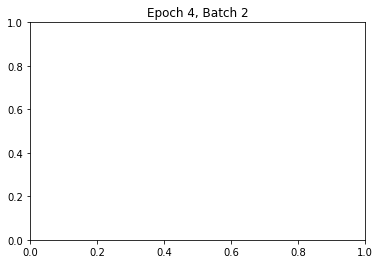

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


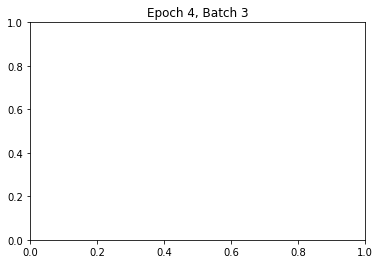

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


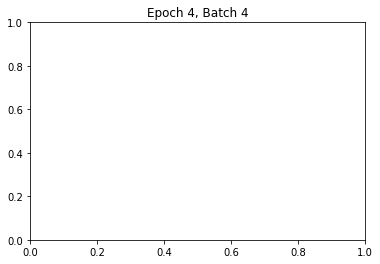

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


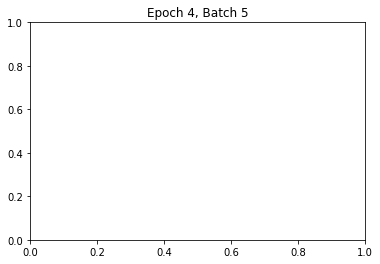

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


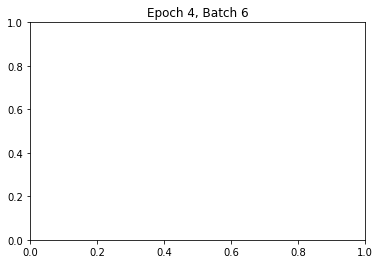

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


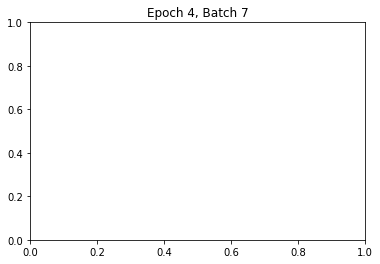

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


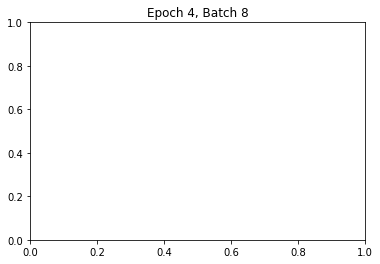

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


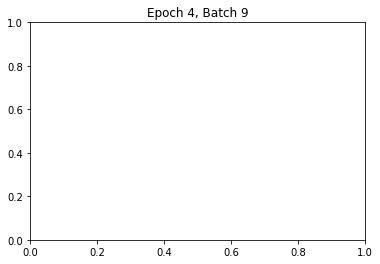

MSE Train:  0.024546979
MSE Test:  4.864185
Pred:  (1, 128)


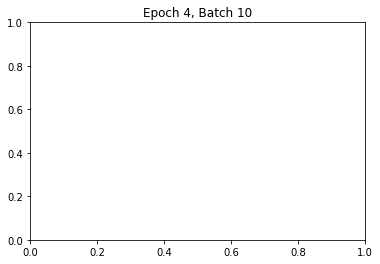

MSE Train:  0.024546977
MSE Test:  4.864185
Pred:  (1, 128)


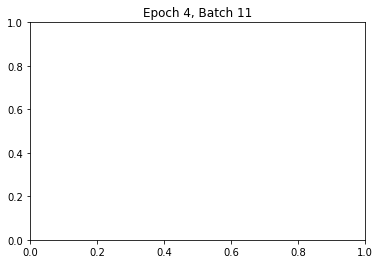

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


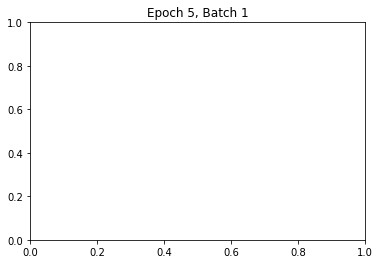

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


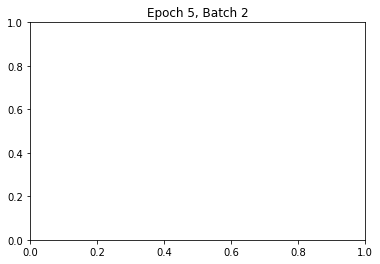

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


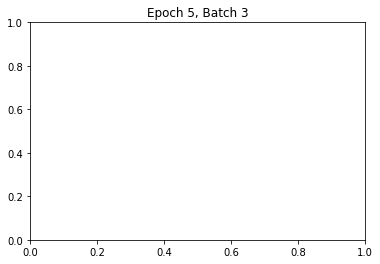

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


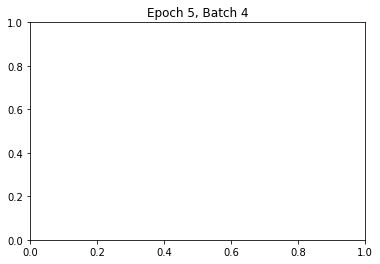

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


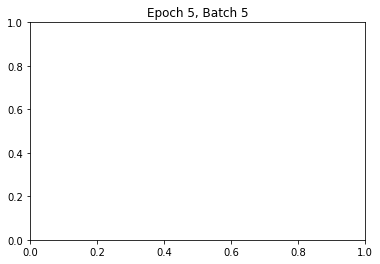

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


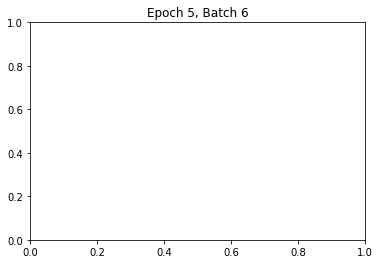

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


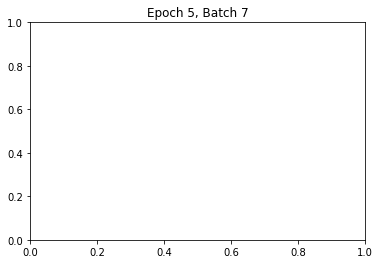

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


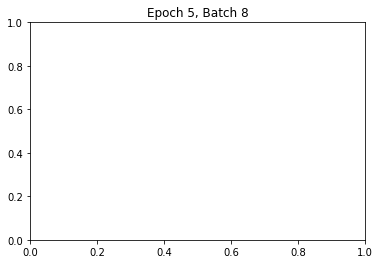

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


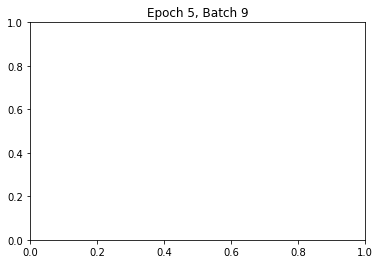

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


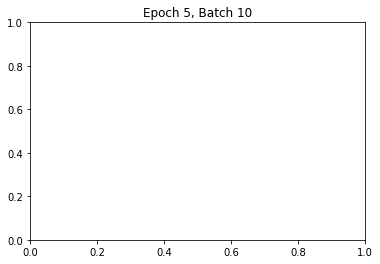

MSE Train:  0.024547158
MSE Test:  4.864185
Pred:  (1, 128)


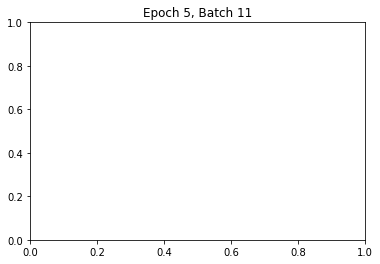

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


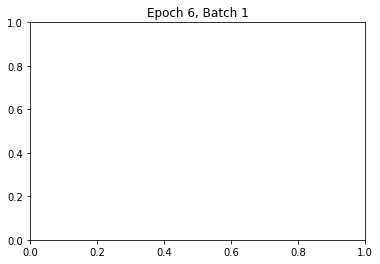

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


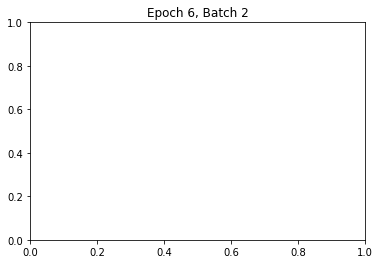

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


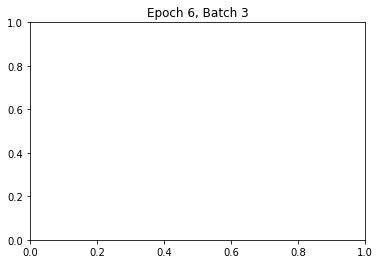

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


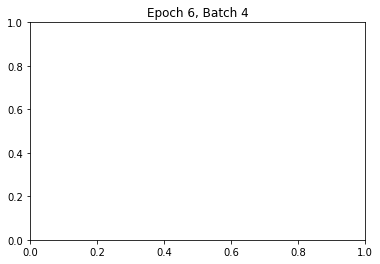

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


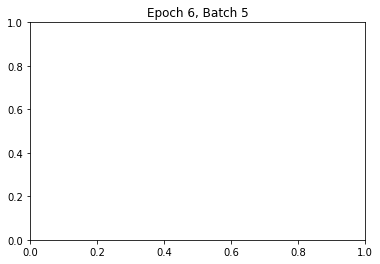

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


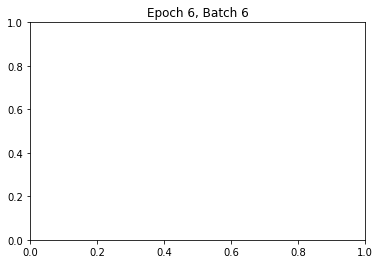

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


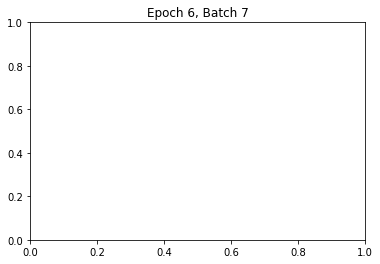

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


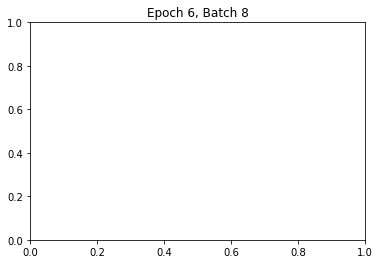

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


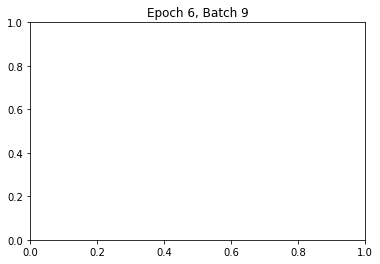

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


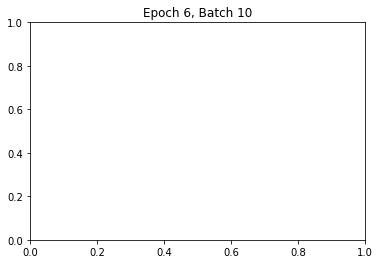

MSE Train:  0.024546992
MSE Test:  4.864185
Pred:  (1, 128)


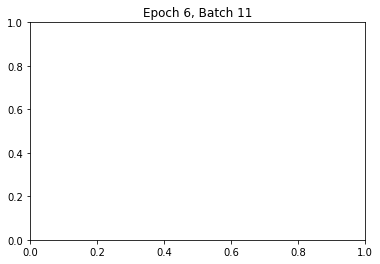

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


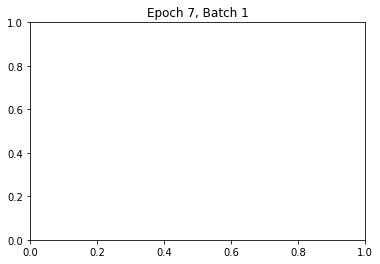

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


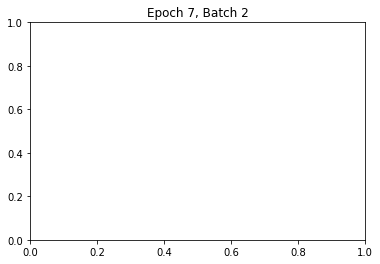

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


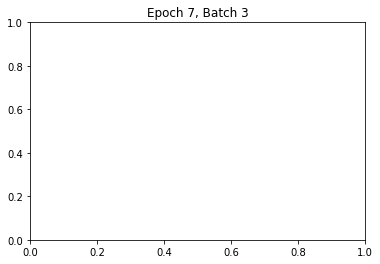

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


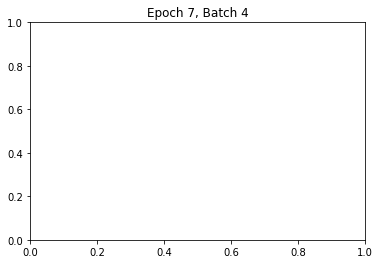

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


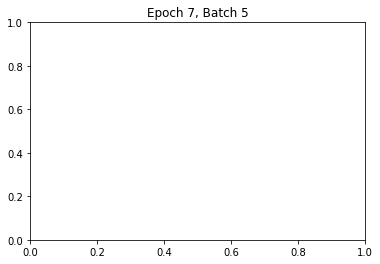

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


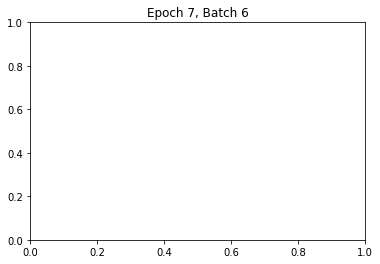

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


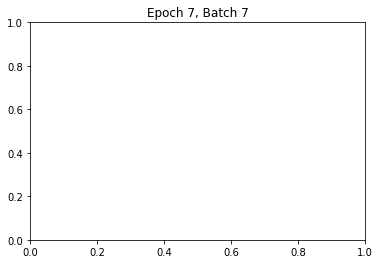

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


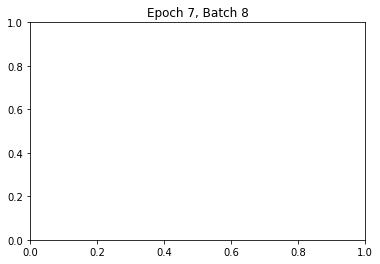

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


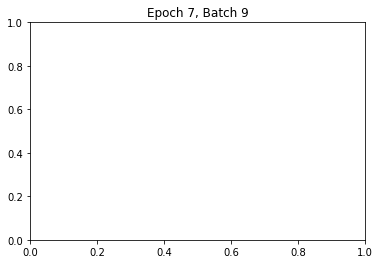

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


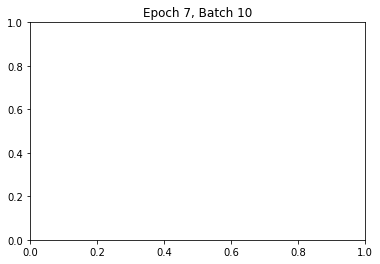

MSE Train:  0.02454735
MSE Test:  4.864185
Pred:  (1, 128)


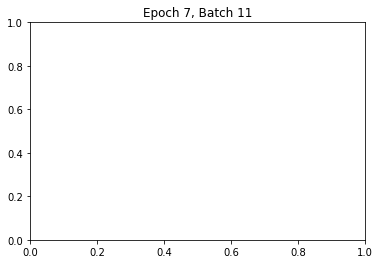

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


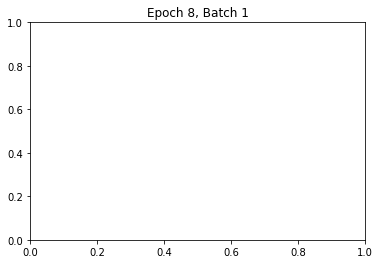

MSE Train:  0.0245473
MSE Test:  4.864185
Pred:  (1, 128)


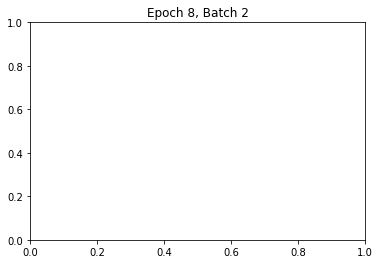

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


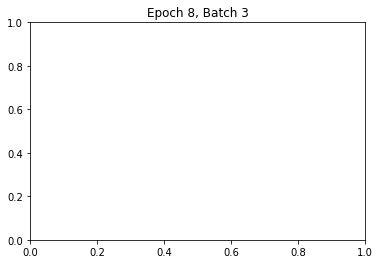

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


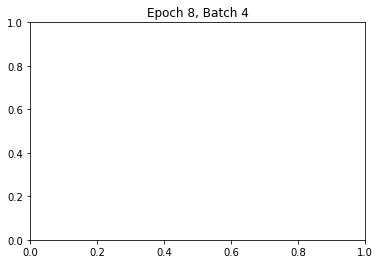

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


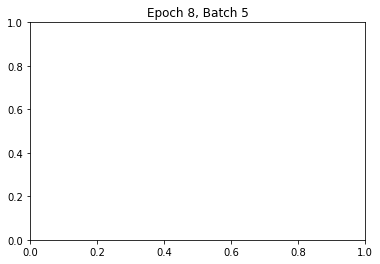

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


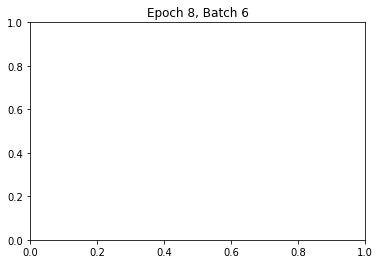

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


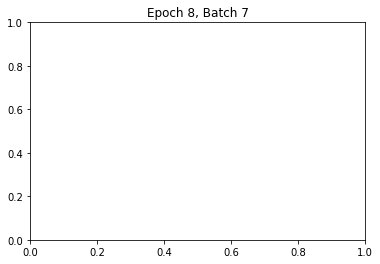

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


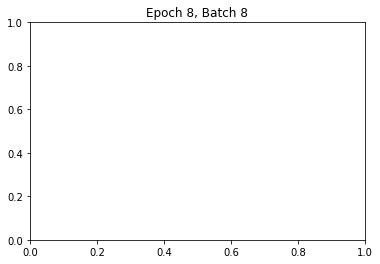

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


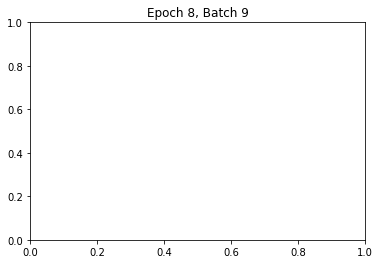

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


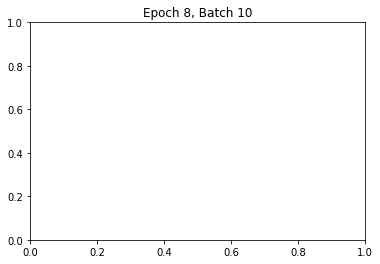

MSE Train:  0.024547298
MSE Test:  4.864185
Pred:  (1, 128)


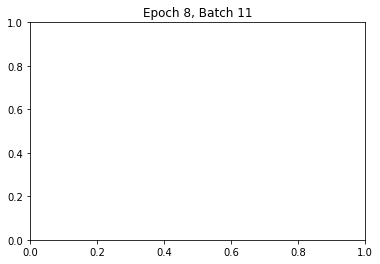

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


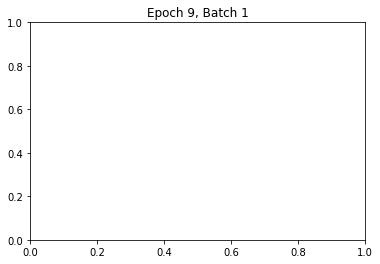

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


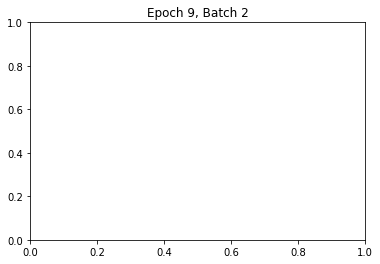

MSE Train:  0.024547067
MSE Test:  4.864185
Pred:  (1, 128)


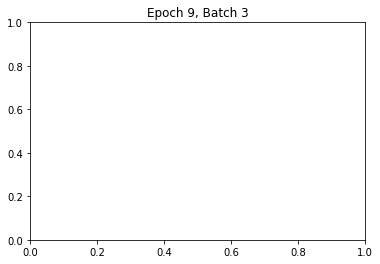

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


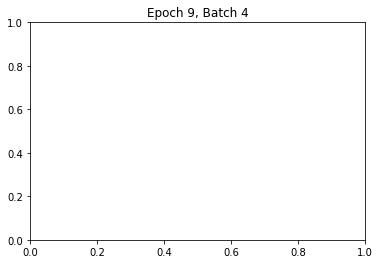

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


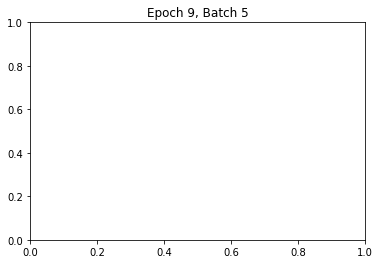

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


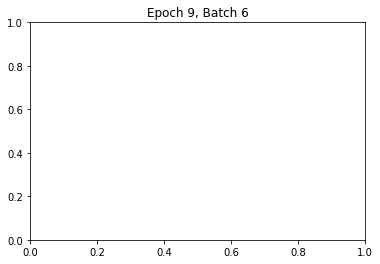

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


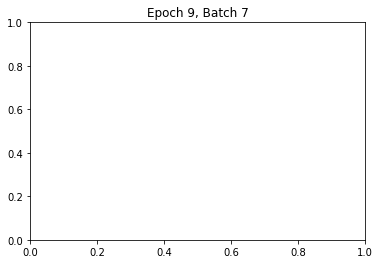

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


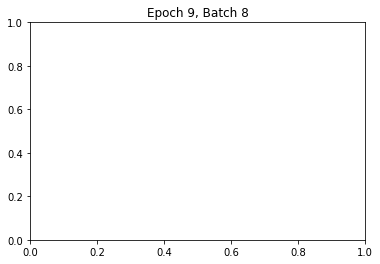

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


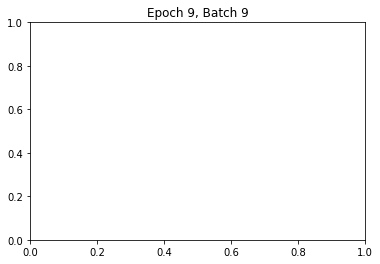

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


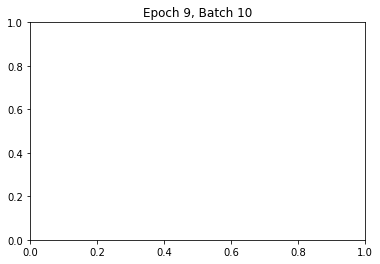

MSE Train:  0.024547065
MSE Test:  4.864185
Pred:  (1, 128)


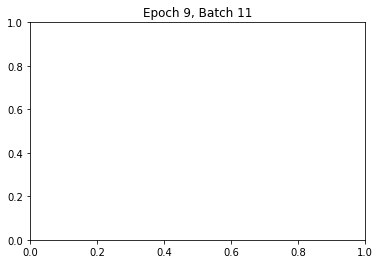

In [124]:
# setup interactive plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
print(y_test.shape, type(y_test))
line2, = ax1.plot(y_test * 0.5)
plt.show()

# number of epochs and batch size
epochs = 10
batch_size = 128

# fit neural net
mse_train = []
mse_test = []

for e in range(epochs):
    
    # shuffle the training data
    shuffle_indices = np.random.permutation(np.arange(len(y_train)))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    
    # mini batch training
    for i in range(0, len(y_train) // batch_size):
        start = i * batch_size
        batch_x = x_train[start : start + batch_size]
        batch_y = y_train[start : start + batch_size]
        # run optimizer with batch
        net.run(opt, feed_dict = {X: x_train, Y: y_train})
        
        # show progress
        if np.mod(i, 50):
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict = {X: x_train, Y: y_train}))
            mse_test.append(net.run(mse, feed_dict = {X: x_test, Y: y_test}))
            print('MSE Train: ', mse_train[-1])
            print('MSE Test: ', mse_test[-1])
            # Prediction
            pred = net.run(out, feed_dict = {X: x_test})
            print('Pred: ', pred.shape)
            line2.set_ydata(pred)
            plt.title('Epoch ' + str(e) + ', Batch ' + str(i))
            plt.pause(0.01)
            

In [129]:
len(y_test)

176

In [130]:
x_test.shape

(176, 3)